<a href="https://colab.research.google.com/github/ismi27/hello-world/blob/master/Submissionismisemogabisaamin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

import zipfile, os 
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2020-06-26 21:50:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.39MB/s    in 48s     

2020-06-26 21:51:01 (6.39 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
!pip install split_folders

In [ ]:
import split_folders
split_folders.ratio('/tmp/rockpaperscissors', output="/tmp/images", seed=1337, ratio=(.8, .2)) # default values

Copying files: 2189 files [00:00, 2407.70 files/s]


In [ ]:
base_dir='/tmp/images'
train_dir=os.path.join(base_dir, 'train')
validation_dir=os.path.join(base_dir, 'val')

os.listdir('/tmp/images/train')

['scissors', 'rps-cv-images', 'paper', 'rock']

In [ ]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
jumlah_train_paper = len(os.listdir(train_paper_dir))
print("Jumlah gambar paper pada data train: ", str(jumlah_train_paper))
jumlah_train_rock = len(os.listdir(train_rock_dir))
print("Jumlah gambar rock pada data train: ", str(jumlah_train_rock))
jumlah_train_scissors = len(os.listdir(train_scissors_dir))
print("Jumlah gambar scissors pada data train: ", str(jumlah_train_scissors))

jumlah_all_train = jumlah_train_paper + jumlah_train_rock + jumlah_train_scissors
print("Jumlah gambar pada data train: ", str(jumlah_all_train))

jumlah_val_paper = len(os.listdir(validation_paper_dir))
print("Jumlah gambar paper pada data validation: ", str(jumlah_val_paper))
jumlah_val_rock=len(os.listdir(validation_rock_dir))
print("Jumlah gambar rock pada data validation: ", str(jumlah_val_rock))
jumlah_val_scissors = len(os.listdir(validation_scissors_dir))
print("Jumlah gambar scissors pada data validation: ", str(jumlah_val_scissors))


jumlah_all_validation = jumlah_val_paper + jumlah_val_rock + jumlah_val_scissors
print("Jumlah gambar pada data validation: ", str(jumlah_all_validation))

print("Jumlah data: ", jumlah_all_train + jumlah_all_validation)

Jumlah gambar paper pada data train:  569
Jumlah gambar rock pada data train:  580
Jumlah gambar scissors pada data train:  600
Jumlah gambar pada data train:  1749
Jumlah gambar paper pada data validation:  143
Jumlah gambar rock pada data validation:  146
Jumlah gambar scissors pada data validation:  150
Jumlah gambar pada data validation:  439
Jumlah data:  2188


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2, 
    fill_mode = 'nearest',
    color_mode = 'rgba'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range=0.2,
    fill_mode = 'nearest',
    color_mode = 'rgba'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (100,100),
    batch_size = 32,
    class_mode = 'categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (100, 100), 
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1749 images belonging to 4 classes.
Found 439 images belonging to 4 classes.


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# model = tf.keras.models.Sequential(
#     [
#      tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(150,150,3), padding='valid'),
#      tf.keras.layers.MaxPooling2D(2,2),
#      tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu, use_bias = True),
#      tf.keras.layers.MaxPooling2D(2,2),
#      tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
#      tf.keras.layers.MaxPooling2D(2,2),
#      tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
#      tf.keras.layers.MaxPooling2D(2,2),
#     #  tf.keras.layers.Dropout(0.2),
#      tf.keras.layers.Flatten(),
#      tf.keras.layers.Dense(512, activation=tf.nn.relu),
#      tf.keras.layers.Dense(4, activation=tf.nn.softmax)
#     ]
# )

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(100,100,3), padding='same'),
     tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same'),
     tf.keras.layers.MaxPooling2D((2,2),strides=(2,2)),
     tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding='same'), 
     tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding='same'),
     tf.keras.layers.MaxPooling2D((2,2),strides=(2,2)),
     tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu, padding='same'),
     tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu, padding='same'),
     tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation=tf.nn.relu),
     tf.keras.layers.Dense(512, activation=tf.nn.relu),
     tf.keras.layers.Dense(4, activation=tf.nn.softmax)
    ]
)

In [ ]:


model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(learning_rate=2e-4),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=2, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0.001, patience=10, verbose=2, mode='auto')
history = model.fit(
    train_generator,
    steps_per_epoch=32, #berapa batch yang akan dieksekusi pada setiap epoch
    epochs=12,
    validation_data=validation_generator, #menampilkan akurasi pengujian data_validasi
    validation_steps=5, #berapa batch yang akan dieksekusi setiap epoch 
    callbacks=[checkpoint, early],
    verbose=2)

Epoch 1/12
32/32 - 5s - loss: 1.1475 - accuracy: 0.3386 - val_loss: 1.0958 - val_accuracy: 0.3625
Epoch 2/12
32/32 - 5s - loss: 1.0624 - accuracy: 0.4590 - val_loss: 0.9829 - val_accuracy: 0.4750
Epoch 3/12
32/32 - 5s - loss: 0.8533 - accuracy: 0.6641 - val_loss: 0.7398 - val_accuracy: 0.6875
Epoch 4/12
32/32 - 5s - loss: 0.6982 - accuracy: 0.7363 - val_loss: 0.6904 - val_accuracy: 0.7812
Epoch 5/12
32/32 - 5s - loss: 0.6047 - accuracy: 0.7818 - val_loss: 0.5780 - val_accuracy: 0.7937
Epoch 6/12
32/32 - 5s - loss: 0.5541 - accuracy: 0.8075 - val_loss: 0.5399 - val_accuracy: 0.8250
Epoch 7/12
32/32 - 5s - loss: 0.4595 - accuracy: 0.8509 - val_loss: 0.4903 - val_accuracy: 0.7875
Epoch 8/12
32/32 - 5s - loss: 0.4103 - accuracy: 0.8598 - val_loss: 0.4241 - val_accuracy: 0.8562
Epoch 9/12
32/32 - 5s - loss: 0.3805 - accuracy: 0.8648 - val_loss: 0.3458 - val_accuracy: 0.8875
Epoch 10/12
32/32 - 5s - loss: 0.2720 - accuracy: 0.9180 - val_loss: 0.2916 - val_accuracy: 0.9000
Epoch 11/12
32/32 -

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 300, 300, 32)      896       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 300, 300, 32)      9248      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 150, 150, 64)      18496     
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 150, 150, 128)     73856     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 75, 75, 128)     

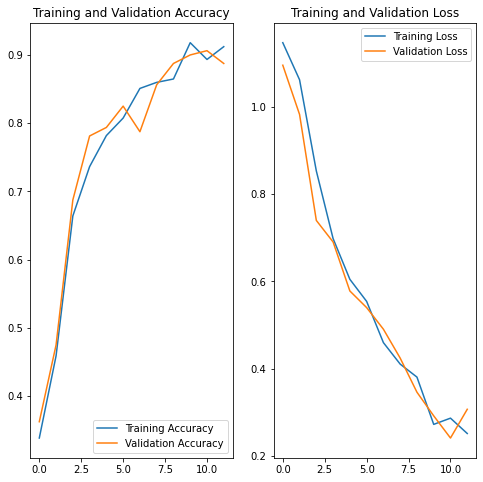

In [ ]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(12)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "submission_ismi"
SAVE_MODEL_NAME = "model.h6"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At model/submission_ismi/model.h6...
INFO:tensorflow:Assets written to: model/submission_ismi/model.h6/assets


Saving 20200626_211405.png to 20200626_211405 (1).png
20200626_211405.png
paper


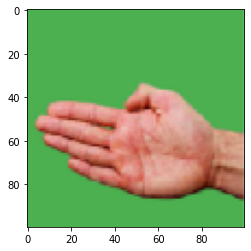

In [ ]:
#meilhat hasil dari model yang telah kita buat 

import numpy as np
from google.colab import files 
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

%matplotlib inline 

uploaded = files.upload()

for fn in uploaded.keys() :
  
  #predicting images
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np. vstack([x])
  classes = model.predict(images, batch_size= 32)

  print(fn)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')